In [11]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_clean_folder = "stage3_data_cleaning/v2"
folder_path = data_clean_folder
xlsx_files = glob.glob(os.path.join(folder_path, '*.xlsx'))
xlsx_files

['stage3_data_cleaning/v2\\type10_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type1_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type2_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type3_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type4_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type5_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type6_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type7_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type8_label_merged_final_decoded_clean3.xlsx',
 'stage3_data_cleaning/v2\\type9_label_merged_final_decoded_clean3.xlsx']

In [ ]:
# df=pd.read_excel(xlsx_files[0])

# df.columns

In [8]:
df.head()

,label,timestamp,can_id,data_length,source_node_id_decimal,service_flag,priority,message_type_decimal,destination_node_id_decimal,request_or_response,...,end_of_message,single_message_frame,transfer_ID,effective_data_0,effective_data_1,effective_data_2,effective_data_3,effective_data_4,effective_data_5,effective_data_6
0,0,0.000000,05040601,8,1,0,5,1030,-99,-99,...,0,0,20,0,0,0,0,0,-199,-199
1,0,0.000139,05040601,7,1,0,5,1030,-99,-99,...,1,0,20,0,0,0,0,0,0,-199
2,0,0.004482,05040601,8,1,0,5,1030,-99,-99,...,0,0,21,0,0,0,0,0,-199,-199
3,0,0.004641,05040601,7,1,0,5,1030,-99,-99,...,1,0,21,0,0,0,0,0,0,-199
4,0,0.009330,05040601,8,1,0,5,1030,-99,-99,...,0,0,22,0,0,0,0,0,-199,-199


In [9]:
data =df

In [10]:
data['label'] = data['label'].apply(lambda x: 'Normal' if x == 0 else 'Attack')
data.head()

,label,timestamp,can_id,data_length,source_node_id_decimal,service_flag,priority,message_type_decimal,destination_node_id_decimal,request_or_response,...,end_of_message,single_message_frame,transfer_ID,effective_data_0,effective_data_1,effective_data_2,effective_data_3,effective_data_4,effective_data_5,effective_data_6
0,Normal,0.000000,05040601,8,1,0,5,1030,-99,-99,...,0,0,20,0,0,0,0,0,-199,-199
1,Normal,0.000139,05040601,7,1,0,5,1030,-99,-99,...,1,0,20,0,0,0,0,0,0,-199
2,Normal,0.004482,05040601,8,1,0,5,1030,-99,-99,...,0,0,21,0,0,0,0,0,-199,-199
3,Normal,0.004641,05040601,7,1,0,5,1030,-99,-99,...,1,0,21,0,0,0,0,0,0,-199
4,Normal,0.009330,05040601,8,1,0,5,1030,-99,-99,...,0,0,22,0,0,0,0,0,-199,-199


In [41]:
def data_distribution(data,folder_path):
    data_summary_df = data['label'].value_counts().reset_index()
    data_summary_df.columns = ['Label', 'Count']
    
    # Plotting the number of normal and attack data points
    plt.figure(figsize=(10, 6))
    bars = plt.bar(data_summary_df['Label'], data_summary_df['Count'], color=['blue', 'red'])
    # Adding labels above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{yval}', ha='center', va='bottom')
    
    plt.xlabel('Data Label')
    plt.ylabel('Count')
    plt.title('Distribution of Normal and Attack Data Points')
    plt.xticks(rotation=0)
    plt.savefig(f'{folder_path}/data_distribution_of_normal_and_attack_data.png')
    plt.show()

In [42]:
def timeseries_histogram_distribution(data,folder_path):
    
    # Check the data type of the timestamp column and convert if necessary
    data['timestamp'] = pd.to_numeric(data['timestamp'], errors='coerce')
    
    data = data.dropna(subset=['timestamp'])

    normal_data = data[data['label'] == 'Normal']
    attack_data = data[data['label'] == 'Attack']
    
    plt.figure(figsize=(14, 6))
    
    # Histogram for Normal data
    plt.subplot(1, 2, 1)
    plt.hist(normal_data['timestamp'], bins=50, color='blue', alpha=0.7)
    plt.title('Timestamp Distribution - Normal Data')
    plt.xlabel('Timestamp')
    plt.ylabel('Frequency')
    
    # Histogram for Attack data
    plt.subplot(1, 2, 2)
    plt.hist(attack_data['timestamp'], bins=50, color='red', alpha=0.7)
    plt.title('Timestamp Distribution - Attack Data')
    plt.xlabel('Timestamp')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig(f'{folder_path}/timeseries_histogram.png')
    plt.show()

In [43]:
def timeseries_density_comparison(data,folder_path):
    data['timestamp'] = pd.to_numeric(data['timestamp'], errors='coerce')
    
    data = data.dropna(subset=['timestamp'])

    normal_data = data[data['label'] == 'Normal']
    attack_data = data[data['label'] == 'Attack']
    plt.figure(figsize=(14, 6))

    sns.kdeplot(normal_data['timestamp'], label='Normal', color='blue', fill=True)
    sns.kdeplot(attack_data['timestamp'], label='Attack', color='red', fill=True)
    
    plt.title('Timestamp Density Comparison - Normal vs. Attack Data')
    plt.xlabel('Timestamp')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(f'{folder_path}/timeseries_density_for_different_class.png')
    plt.show()

In [44]:
graph_folder = "graphs"
os.makedirs(graph_folder, exist_ok=True)

In [45]:
df.head()

,label,timestamp,can_id,data_length,source_node_id_decimal,service_flag,priority,message_type_decimal,destination_node_id_decimal,request_or_response,...,end_of_message,single_message_frame,transfer_ID,effective_data_0,effective_data_1,effective_data_2,effective_data_3,effective_data_4,effective_data_5,effective_data_6
0,0,0.000000,05040601,8,1,0,5,1030,-99,-99,...,0,0,20,0,0,0,0,0,-199,-199
1,0,0.000139,05040601,7,1,0,5,1030,-99,-99,...,1,0,20,0,0,0,0,0,0,-199
2,0,0.004482,05040601,8,1,0,5,1030,-99,-99,...,0,0,21,0,0,0,0,0,-199,-199
3,0,0.004641,05040601,7,1,0,5,1030,-99,-99,...,1,0,21,0,0,0,0,0,0,-199
4,0,0.009330,05040601,8,1,0,5,1030,-99,-99,...,0,0,22,0,0,0,0,0,-199,-199


In [46]:
folder_path

'graphs\\type10_label'

stage3_data_cleaning/v2\type10_label_merged_final_decoded_clean3.xlsx


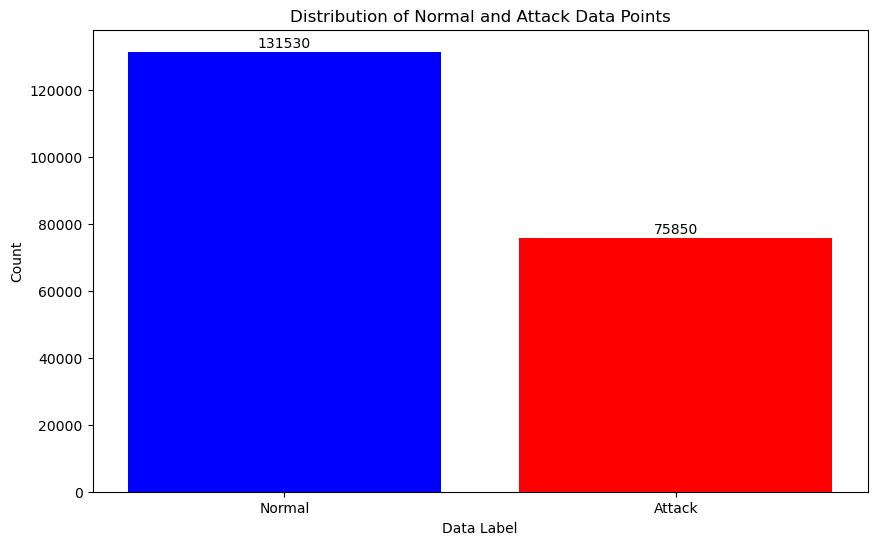

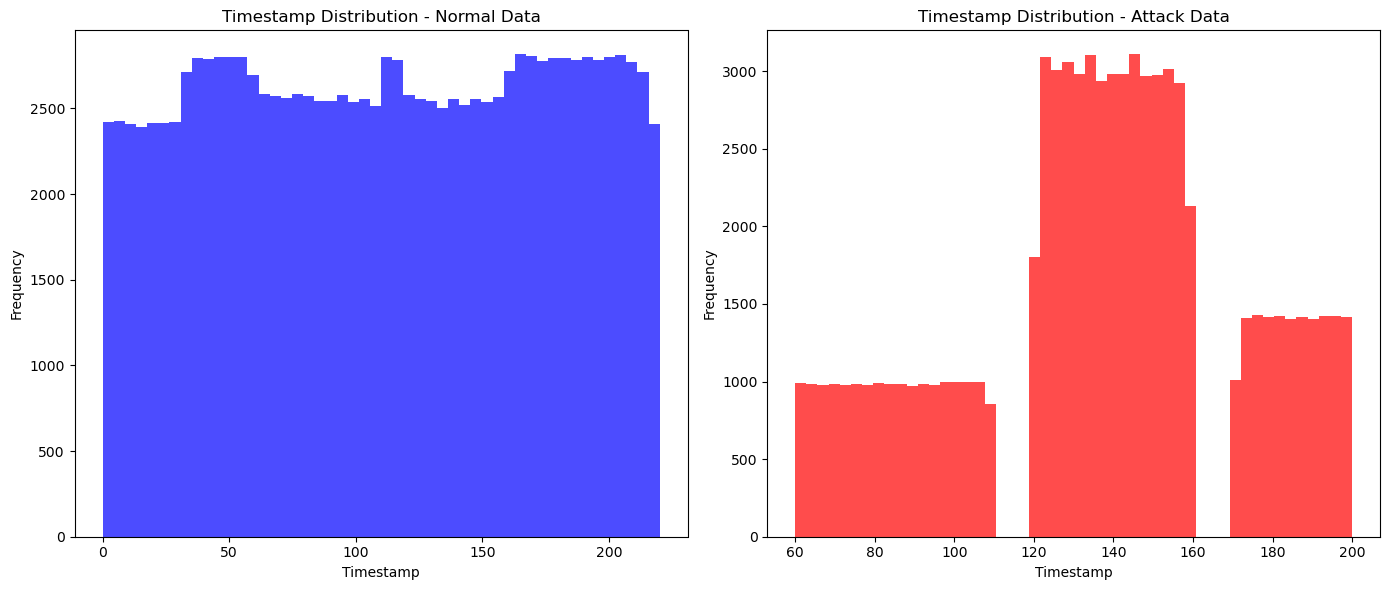

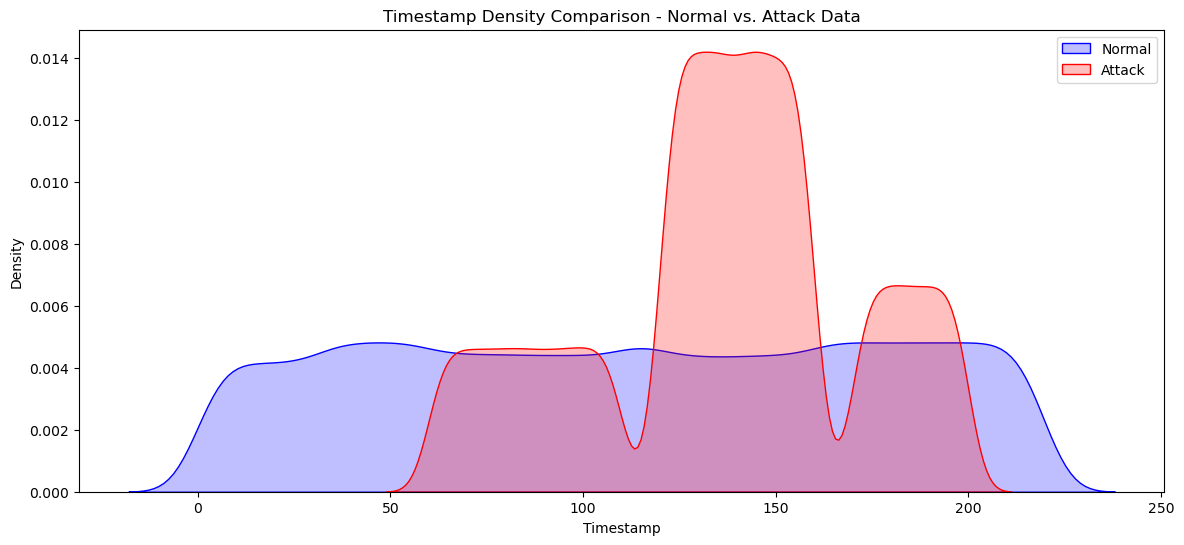

stage3_data_cleaning/v2\type1_label_merged_final_decoded_clean3.xlsx


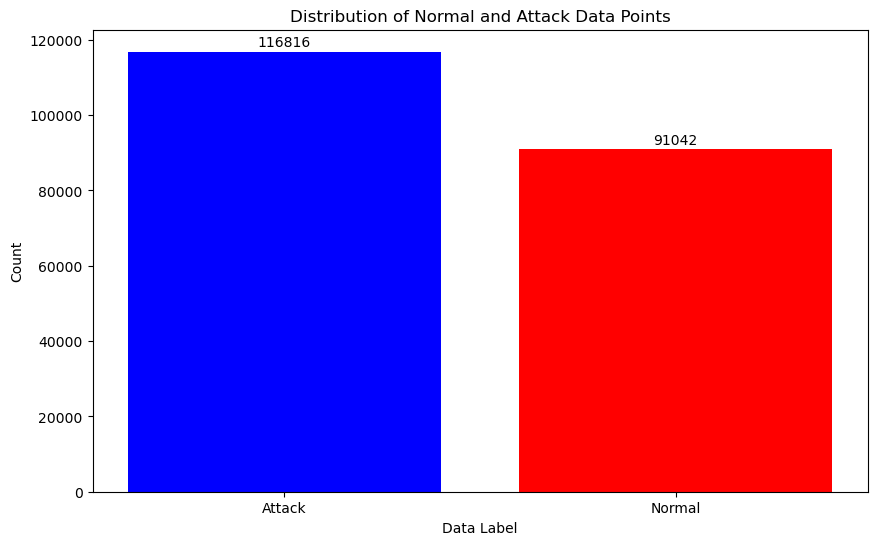

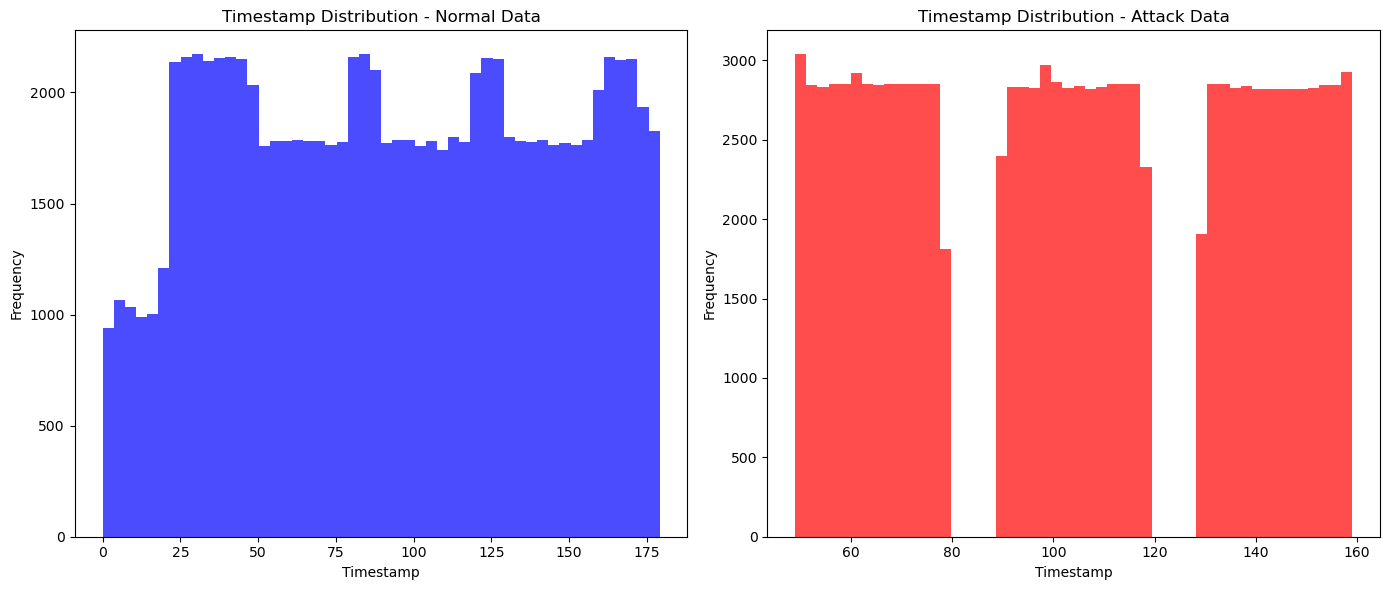

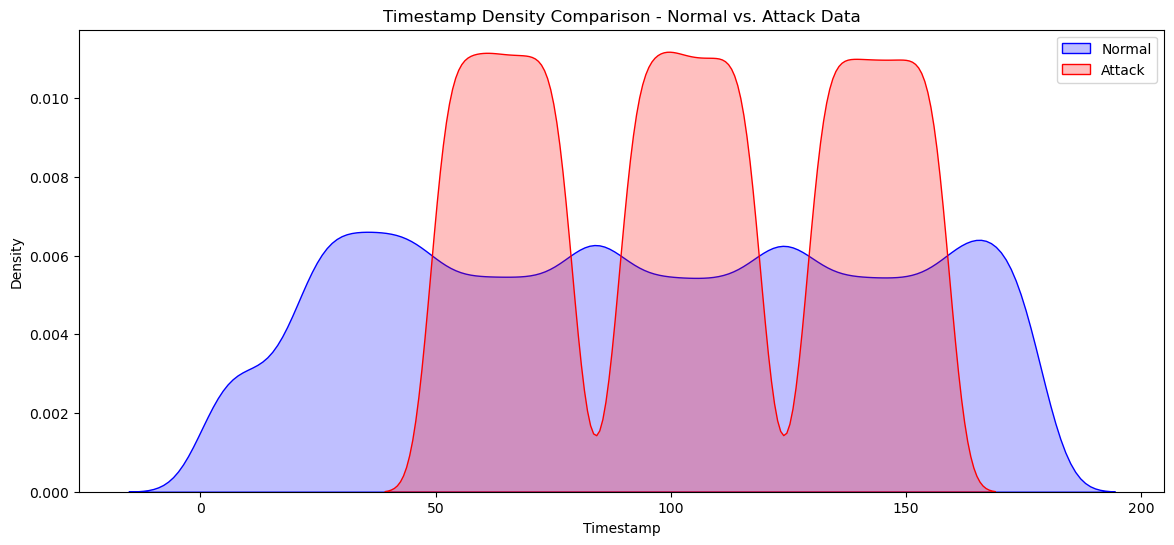

stage3_data_cleaning/v2\type2_label_merged_final_decoded_clean3.xlsx


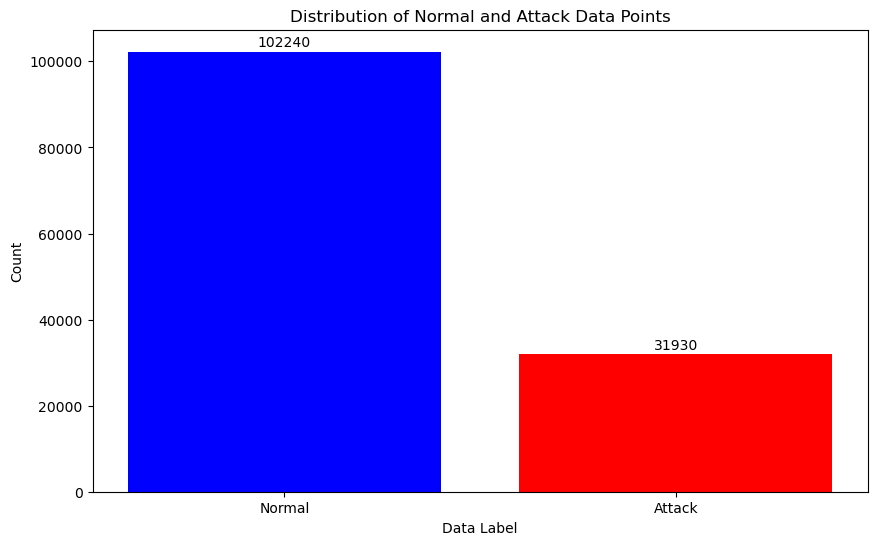

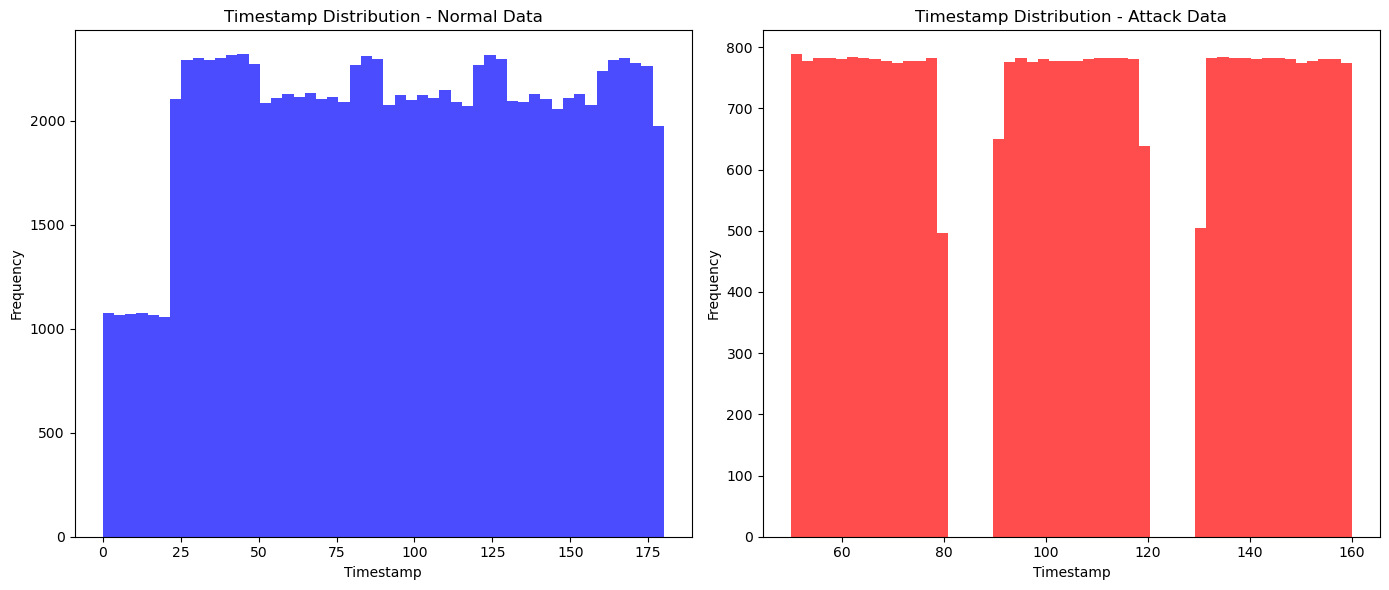

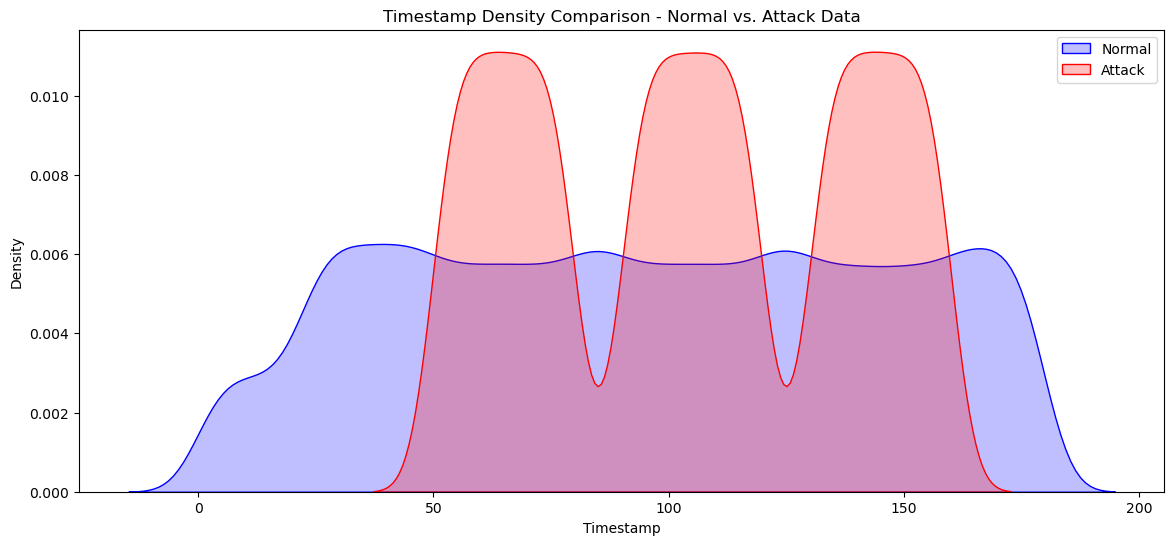

stage3_data_cleaning/v2\type3_label_merged_final_decoded_clean3.xlsx


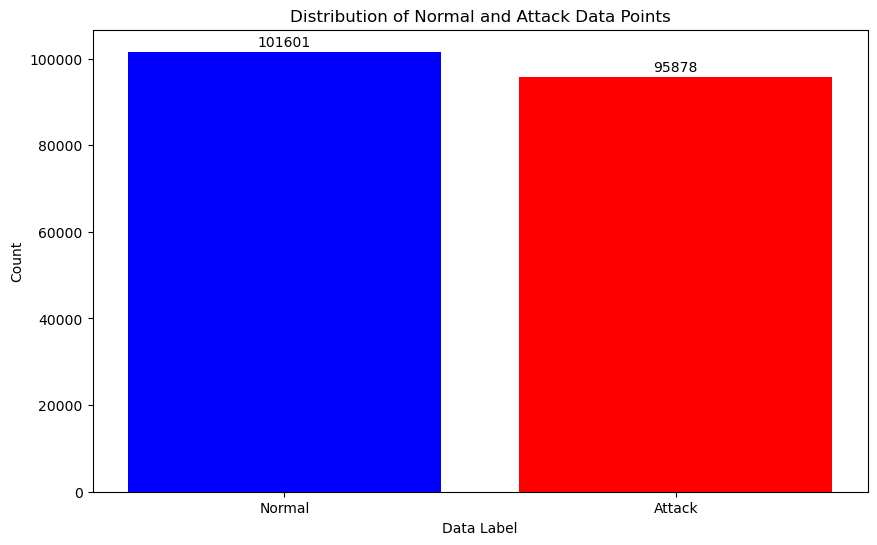

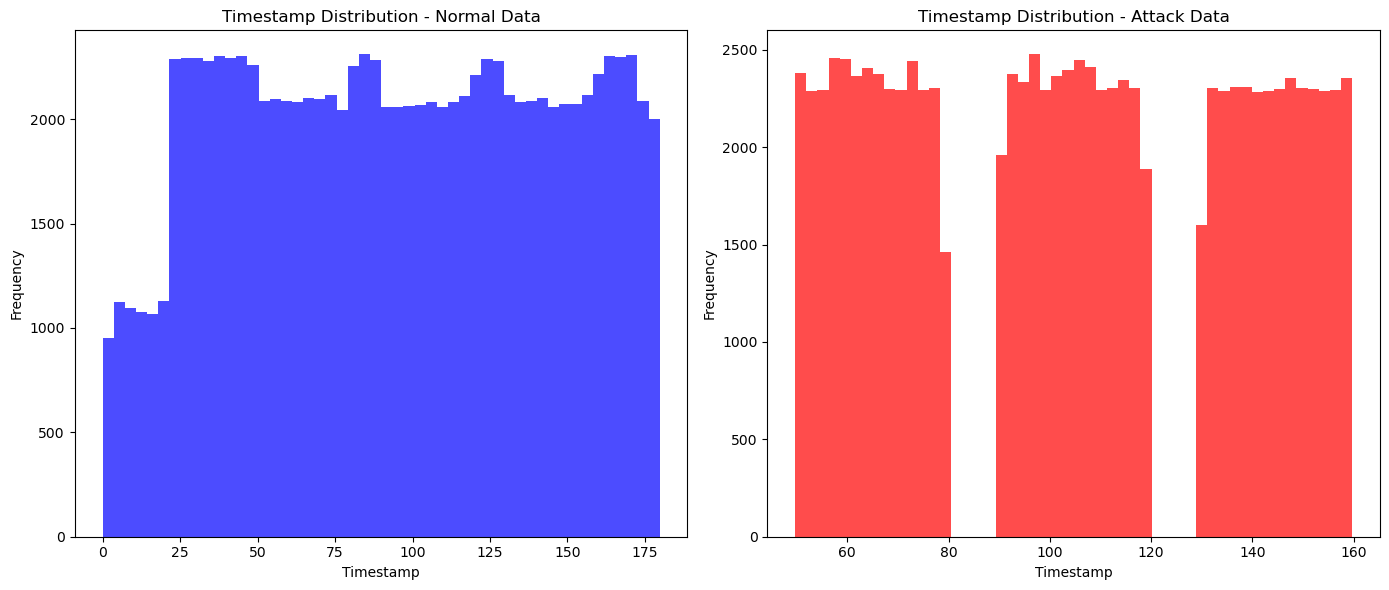

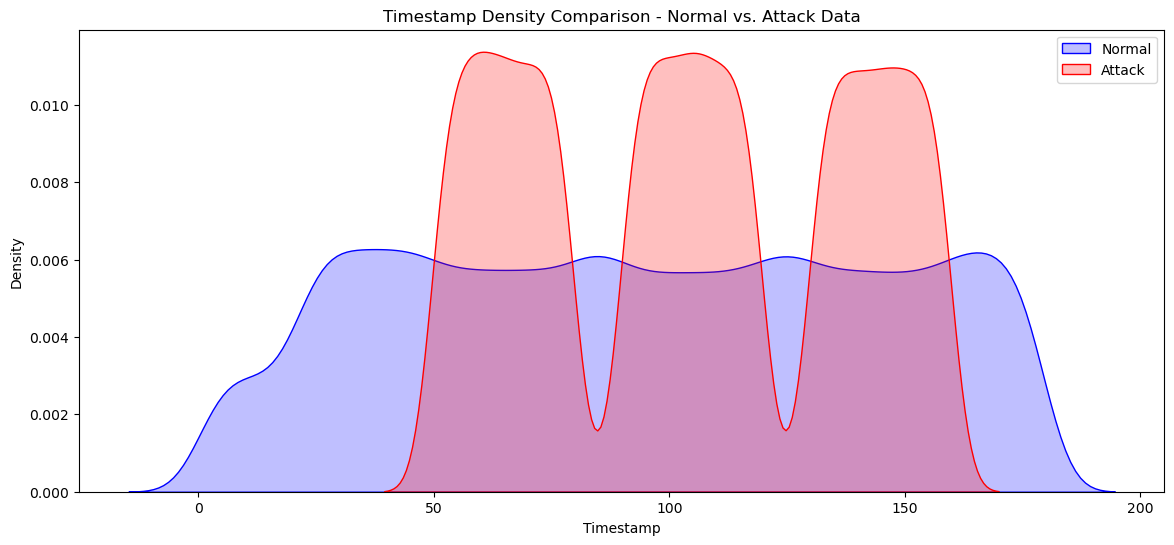

stage3_data_cleaning/v2\type4_label_merged_final_decoded_clean3.xlsx


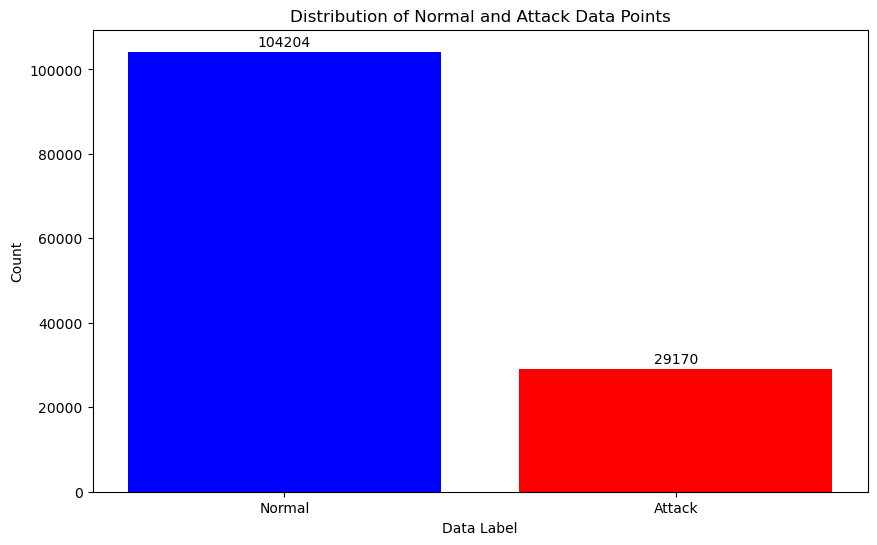

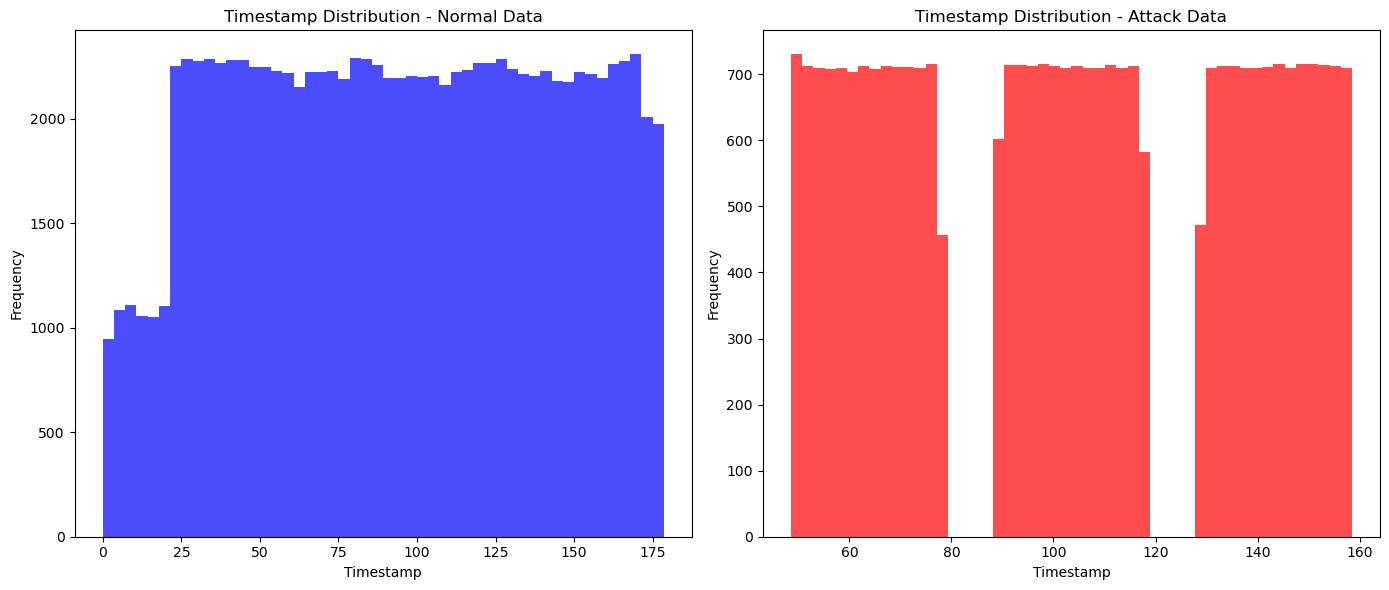

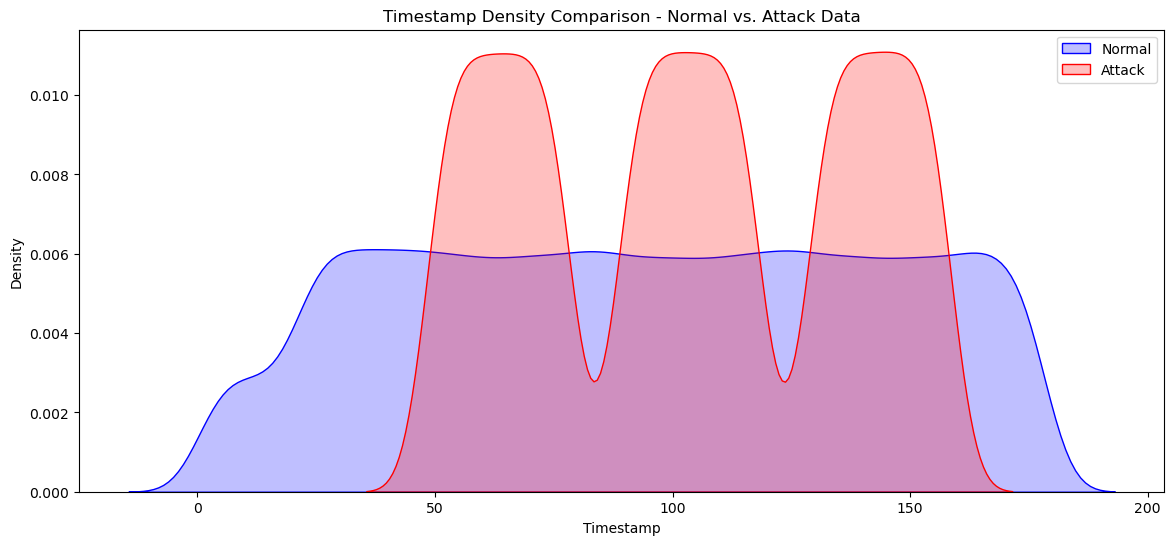

stage3_data_cleaning/v2\type5_label_merged_final_decoded_clean3.xlsx


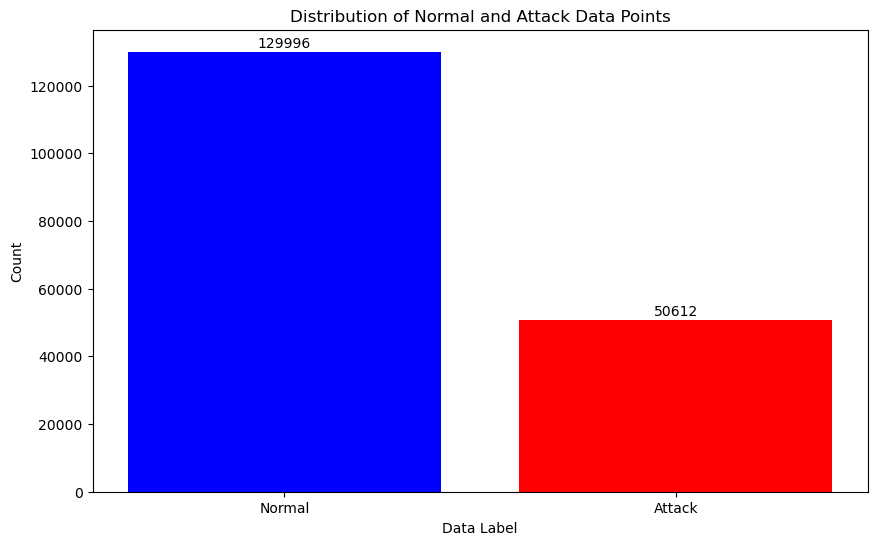

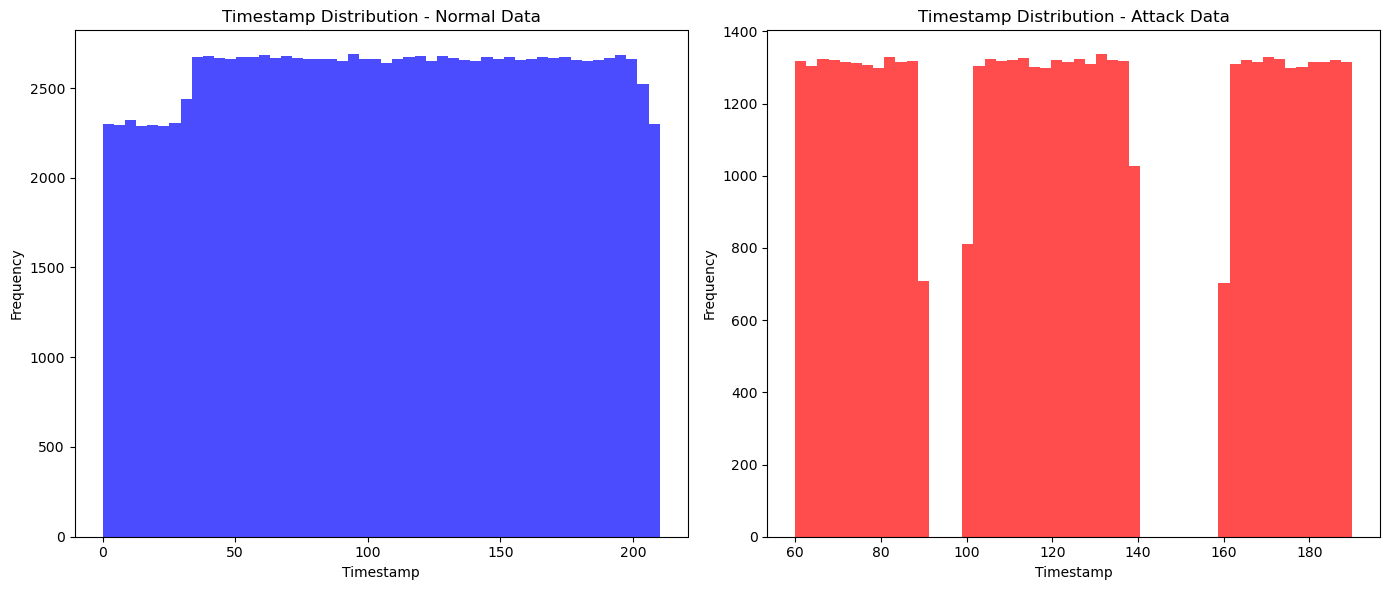

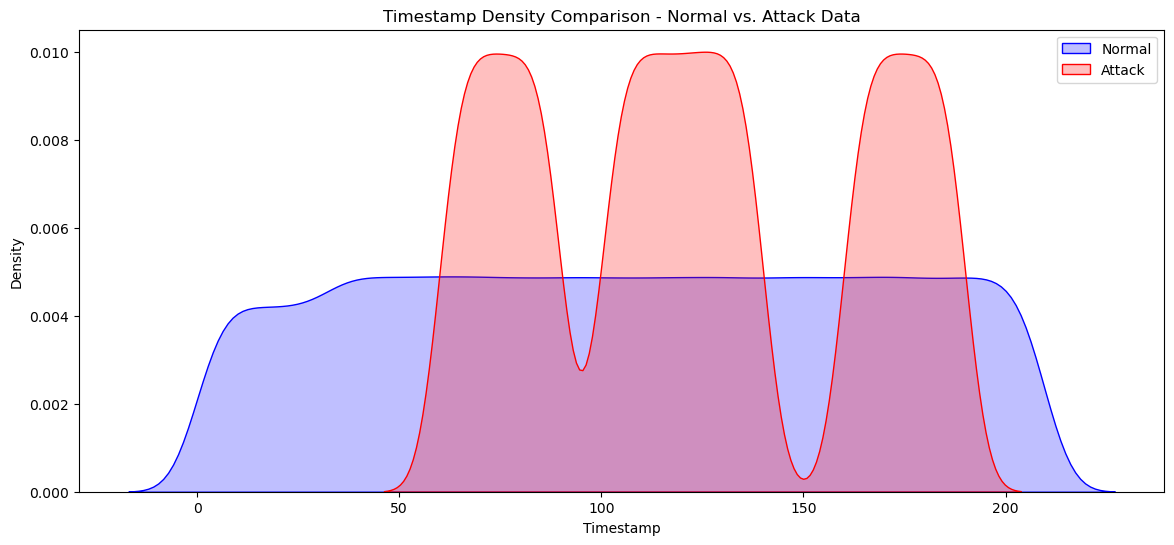

stage3_data_cleaning/v2\type6_label_merged_final_decoded_clean3.xlsx


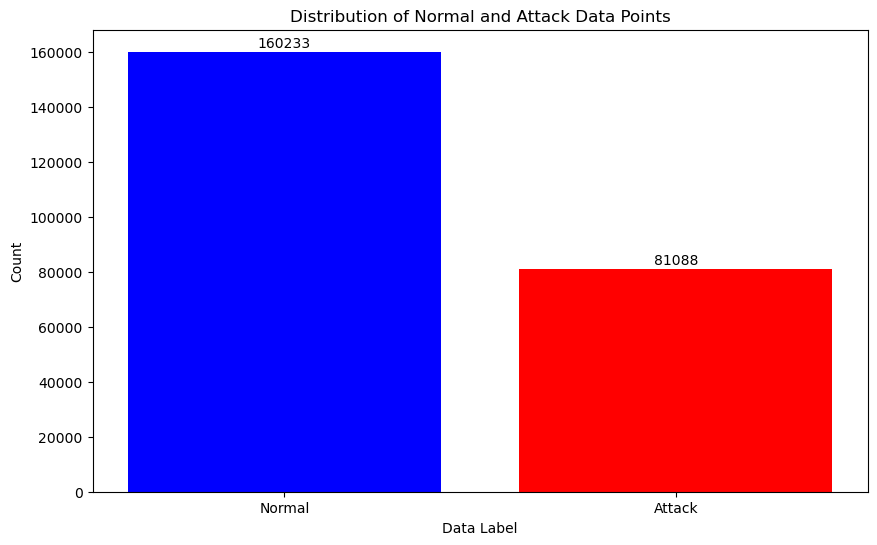

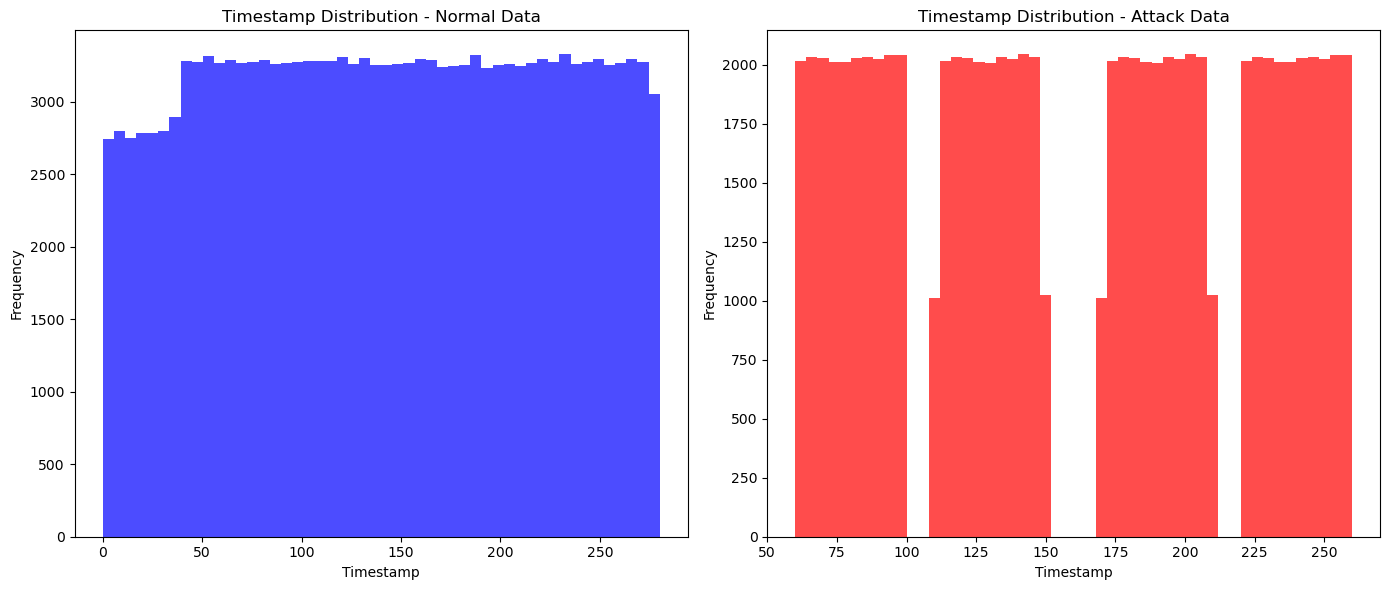

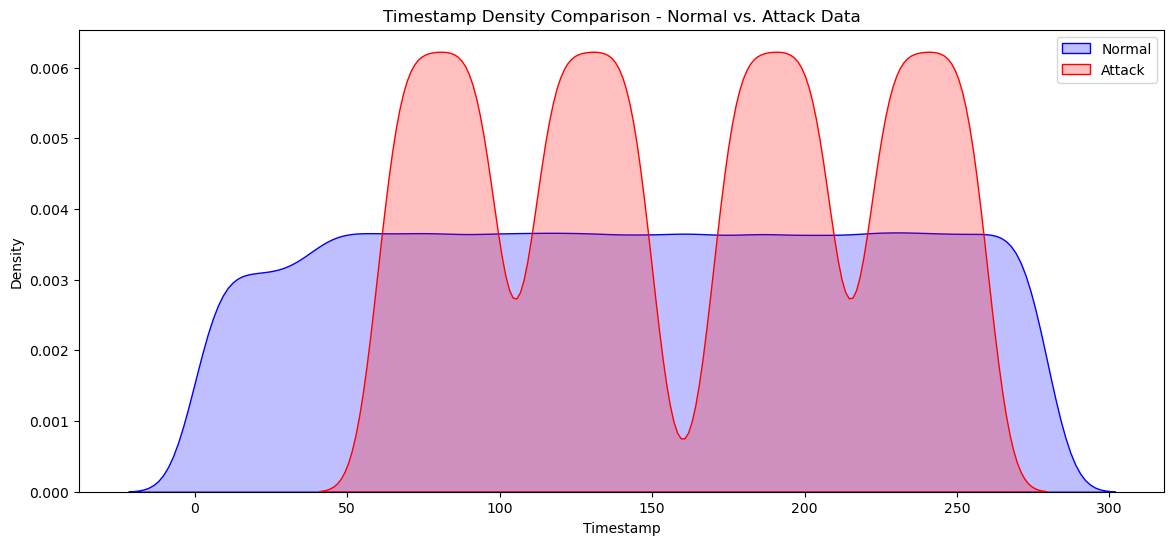

stage3_data_cleaning/v2\type7_label_merged_final_decoded_clean3.xlsx


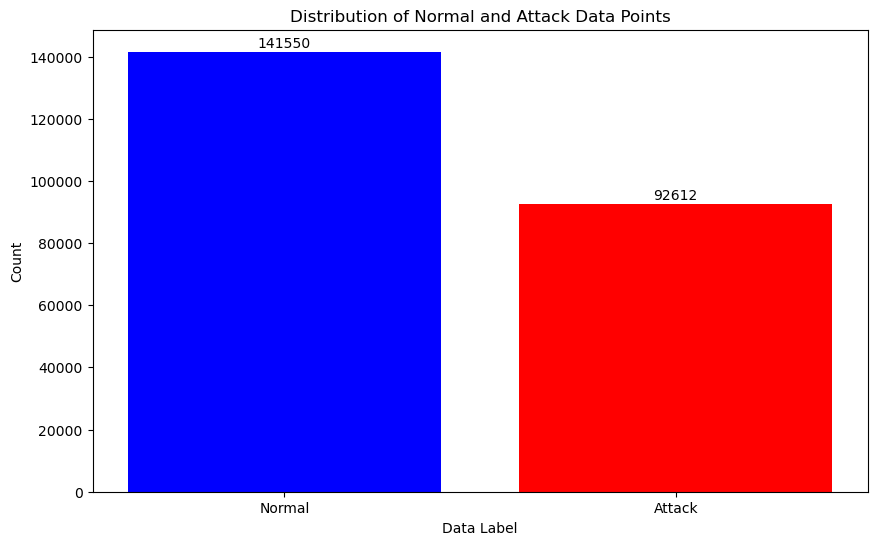

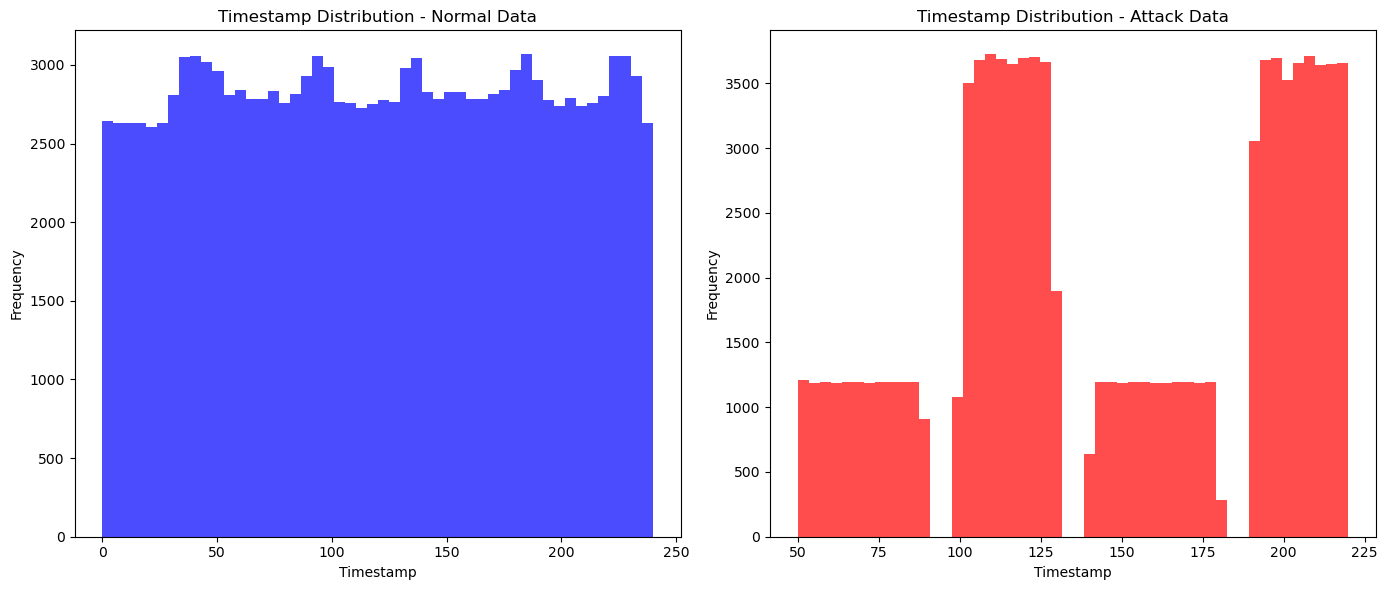

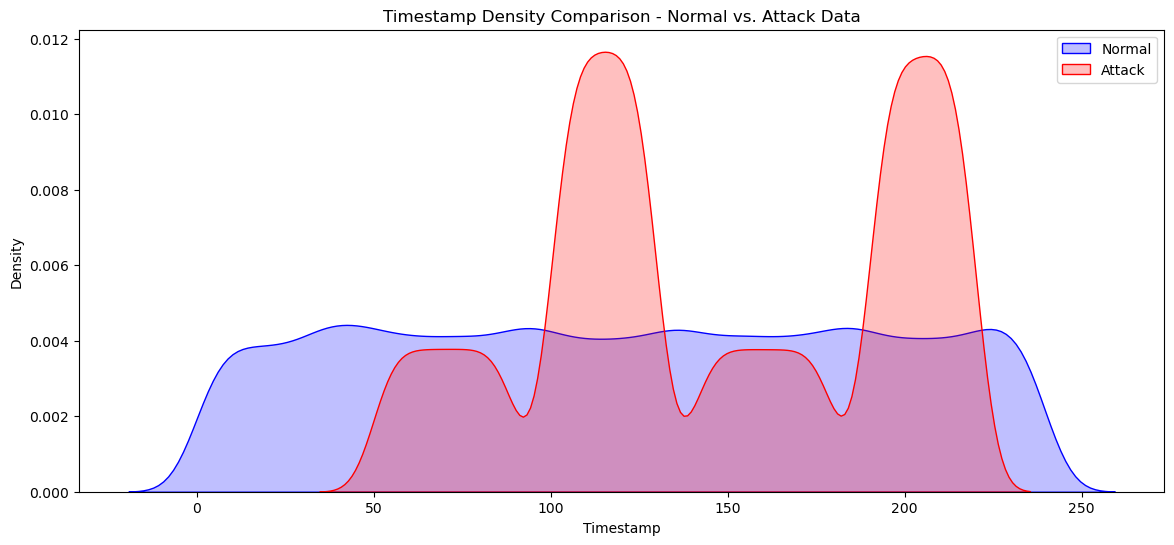

stage3_data_cleaning/v2\type8_label_merged_final_decoded_clean3.xlsx


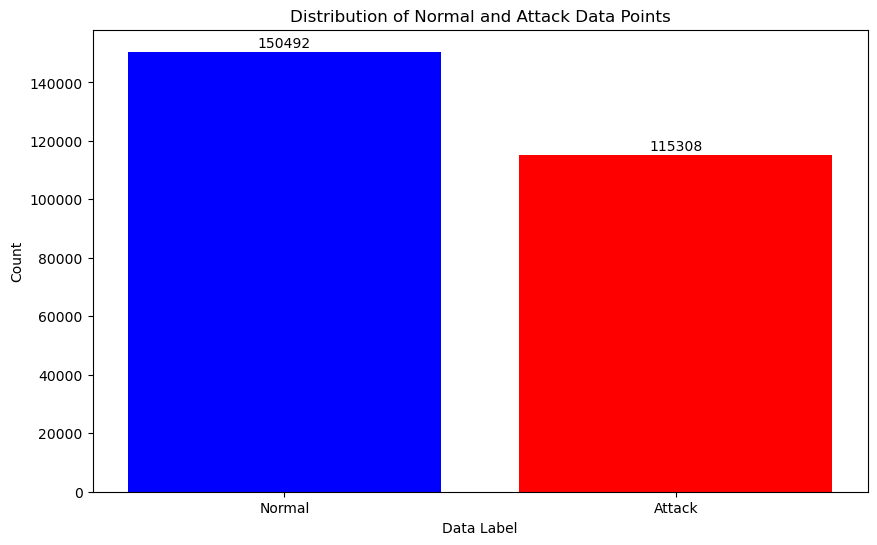

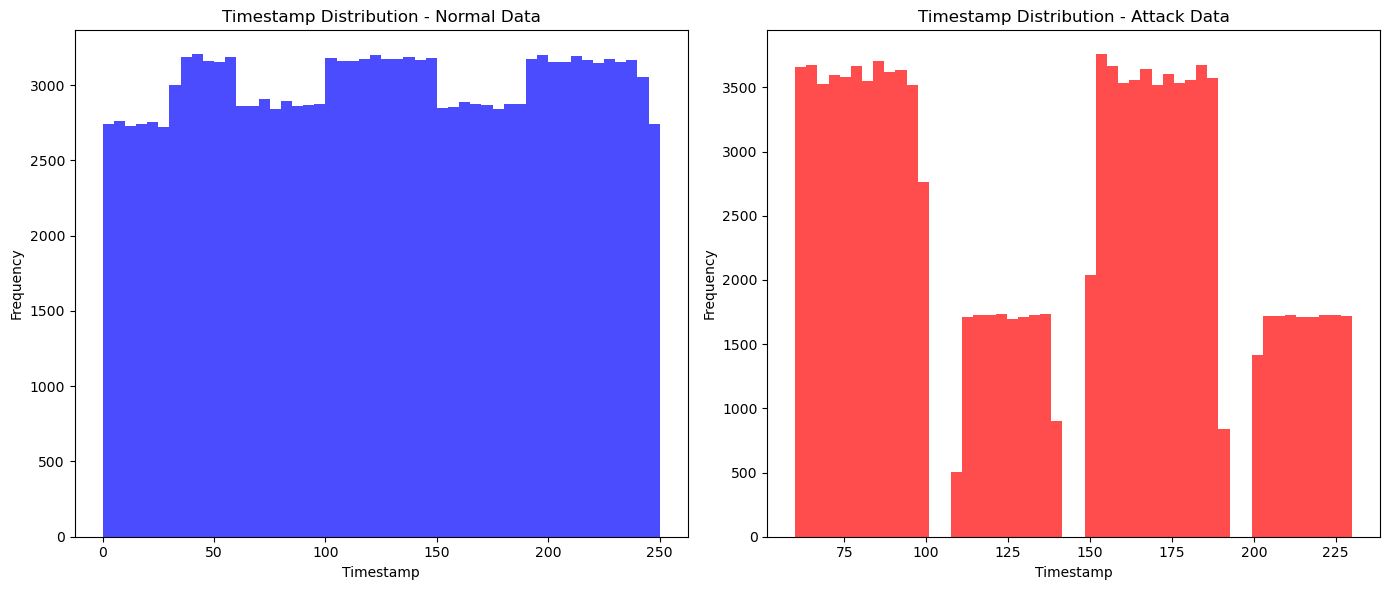

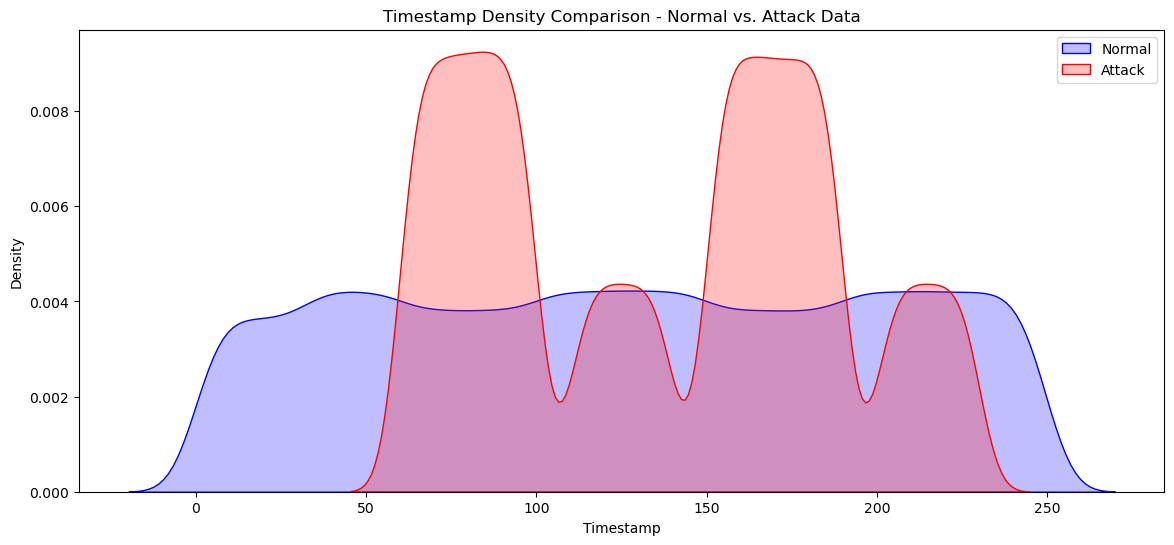

stage3_data_cleaning/v2\type9_label_merged_final_decoded_clean3.xlsx


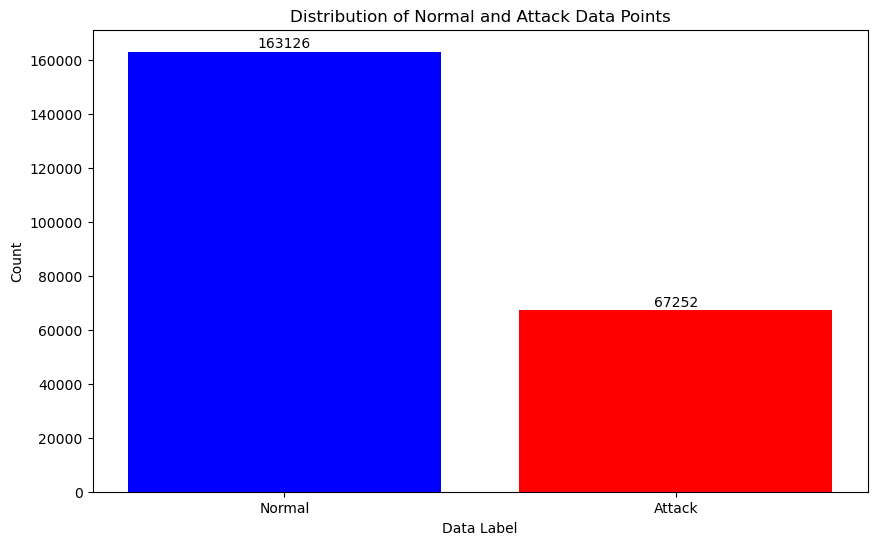

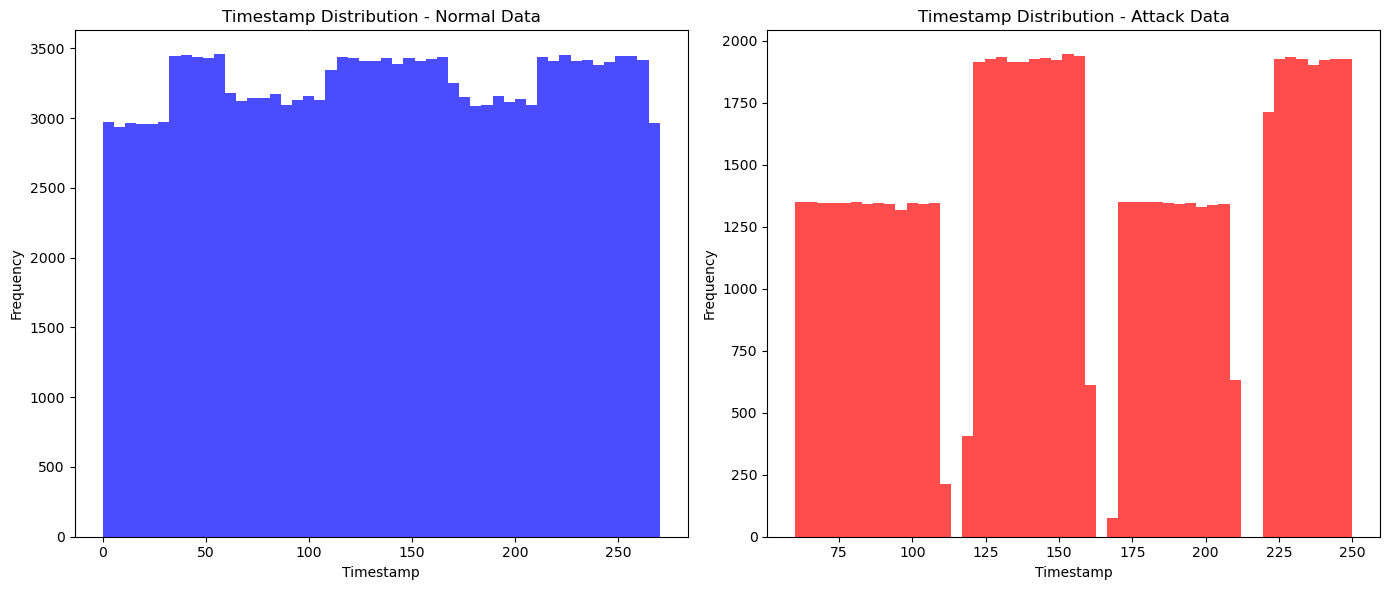

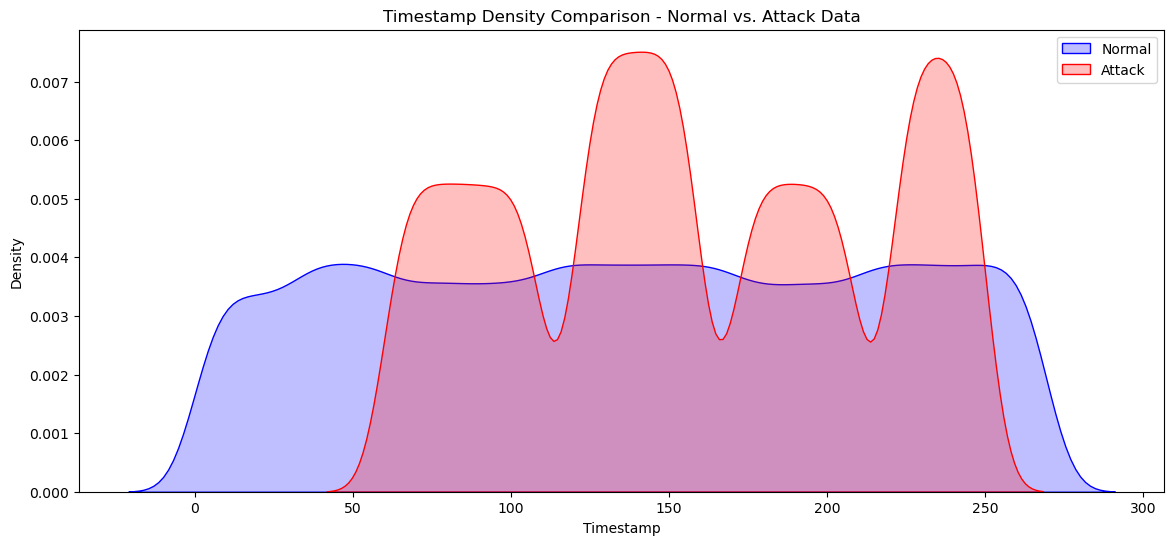

In [49]:
for file_path in xlsx_files:
    print(file_path)
    df=pd.read_excel(file_path)
    df['label'] = df['label'].apply(lambda x: 'Normal' if x == 0 else 'Attack')
    
    label_key = os.path.basename(file_path).split('.')[0][:-28]
    
    # print(label_key)
    folder_path = os.path.join(graph_folder,label_key)
    os.makedirs(folder_path, exist_ok=True)
    data_distribution(df,folder_path)
    timeseries_histogram_distribution(df,folder_path)
    timeseries_density_comparison(df,folder_path)
    # break